In [145]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

In [146]:
train_df=pd.read_csv("D:\sales_price_project\data\Train.csv")
test_df=pd.read_csv("D:\sales_price_project\data\Test.csv")

In [147]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [148]:
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [149]:
train_df.shape

(8523, 12)

In [150]:
test_df.shape

(5681, 11)

In [151]:
train_df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [152]:
test_df.nunique()

Item_Identifier              1543
Item_Weight                   410
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

In [153]:
train_df.info() #info about the data present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [154]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [155]:
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


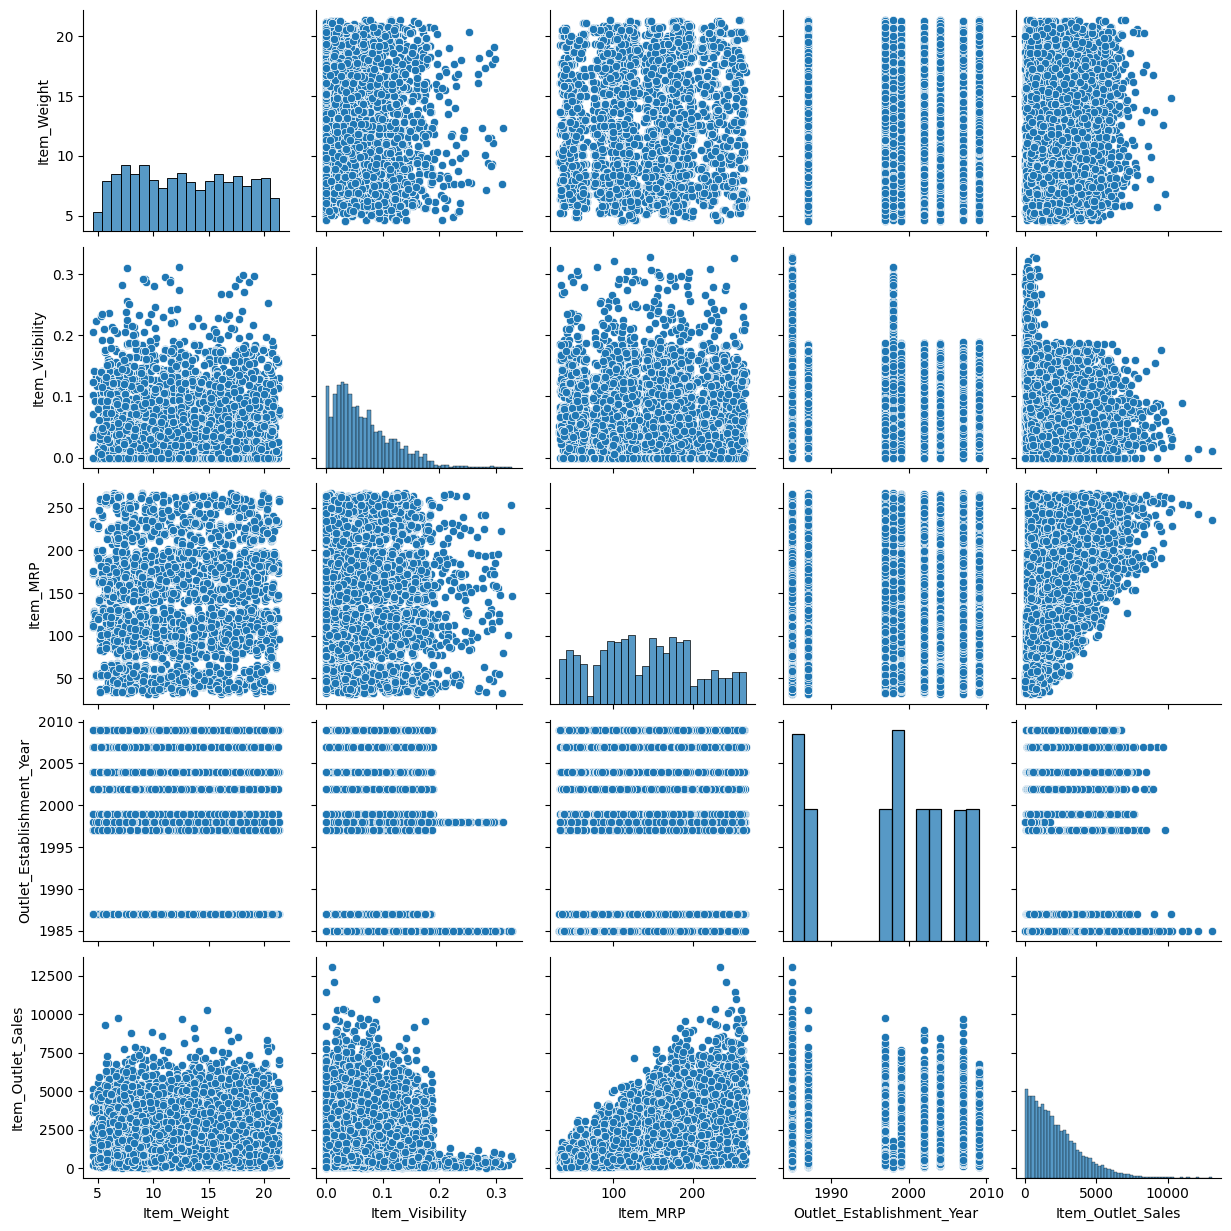

In [156]:
sns.pairplot(data=train_df)

In [157]:
train_df.columns.value_counts()

Item_Identifier              1
Item_Weight                  1
Item_Fat_Content             1
Item_Visibility              1
Item_Type                    1
Item_MRP                     1
Outlet_Identifier            1
Outlet_Establishment_Year    1
Outlet_Size                  1
Outlet_Location_Type         1
Outlet_Type                  1
Item_Outlet_Sales            1
Name: count, dtype: int64

In [158]:
categorical_features = train_df.select_dtypes(include=['object']).columns

numerical_features = train_df.select_dtypes(include=['int64', 'float64']).columns

print("Categorical columns:", categorical_features)
print("Numerical columns:", numerical_features)

Categorical columns: Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')
Numerical columns: Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')


In [159]:
train_df.isna().sum().sort_values(ascending=False)

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [160]:
test_df.isna().sum().sort_values(ascending=False)

Outlet_Size                  1606
Item_Weight                   976
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [161]:
#filling missing values according to the data.

train_df['Item_Weight'] = np.where(train_df['Item_Weight'].isna(),train_df['Item_Weight'].median(skipna = True),train_df['Item_Weight'])
train_df['Outlet_Size'] = np.where(train_df['Outlet_Size'].isna(),train_df['Outlet_Size'].mode(), train_df['Outlet_Size'])

test_df['Item_Weight'] = np.where(test_df['Item_Weight'].isna(),test_df['Item_Weight'].median(skipna = True),test_df['Item_Weight'])
test_df['Outlet_Size'] = np.where(test_df['Outlet_Size'].isna(),test_df['Outlet_Size'].mode(), test_df['Outlet_Size'])

In [162]:
train_df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [163]:
test_df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [164]:
train_df.Outlet_Size.unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [165]:
train_df.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [166]:
train_df.Outlet_Location_Type.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [167]:
train_df.Outlet_Identifier.unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [168]:
train_df.Outlet_Establishment_Year.unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [169]:
train_df.Item_Identifier.nunique()

1559

In [170]:
train_df.Item_Weight.nunique()

415

In [171]:
train_df.Item_MRP.nunique()

5938

In [172]:
train_df.Item_Visibility.nunique()

7880

In [173]:
train_df.Item_Outlet_Sales.nunique()

3493

In [174]:
train_df.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [175]:
train_df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [176]:
#converting the Item_Fat_Content into proper values

train_df['Item_Fat_Content'] = train_df['Item_Fat_Content'].replace('low fat', 'Low Fat')
train_df['Item_Fat_Content'] = train_df['Item_Fat_Content'].replace('LF', 'Low Fat')
train_df['Item_Fat_Content'] = train_df['Item_Fat_Content'].replace('reg', 'Regular')

test_df['Item_Fat_Content'] = test_df['Item_Fat_Content'].replace('low fat', 'Low Fat')
test_df['Item_Fat_Content'] = test_df['Item_Fat_Content'].replace('LF', 'Low Fat')
test_df['Item_Fat_Content'] = test_df['Item_Fat_Content'].replace('reg', 'Regular')

train_df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

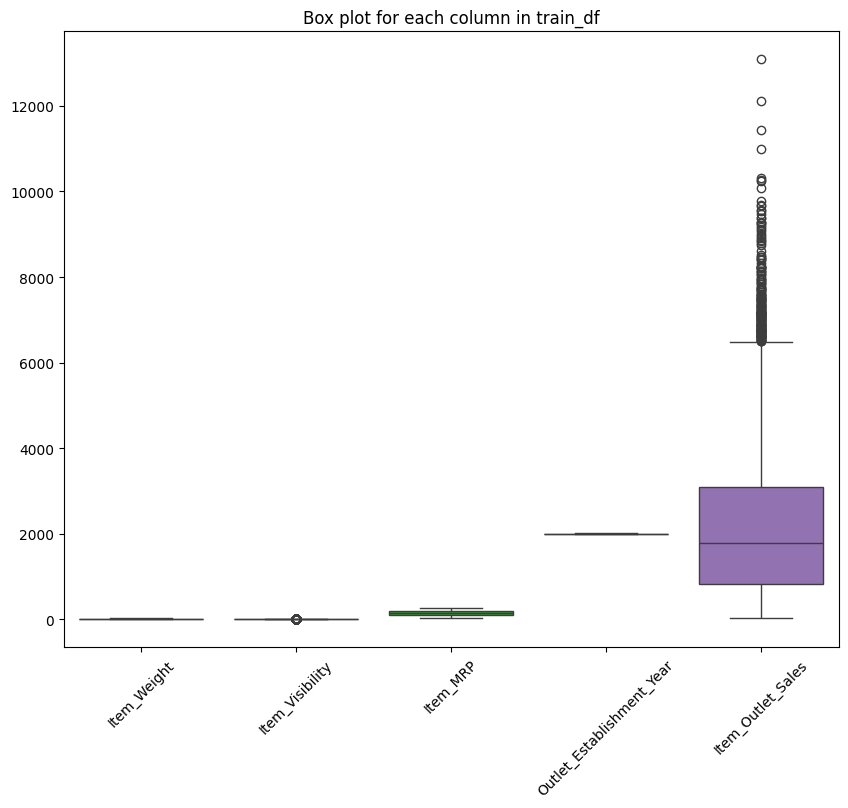

In [177]:
#detecting_outliers
plt.figure(figsize=(10, 8))
sns.boxplot(data=train_df)
plt.title('Box plot for each column in train_df')
plt.xticks(rotation=45)
plt.show()


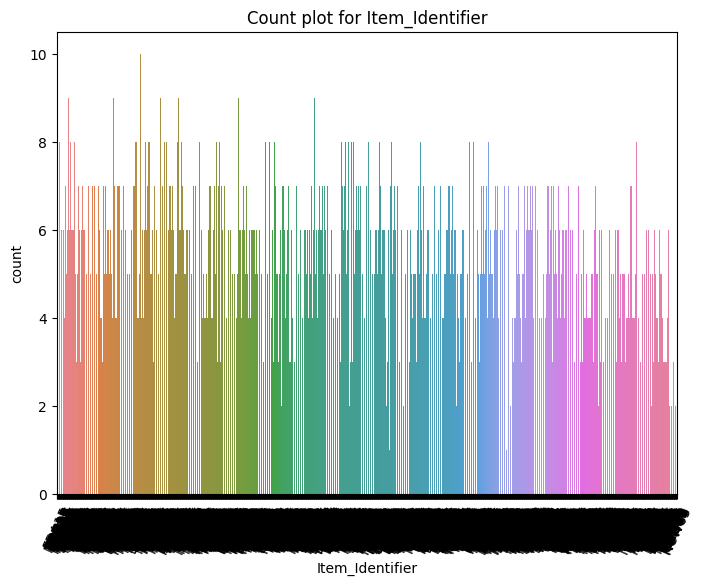

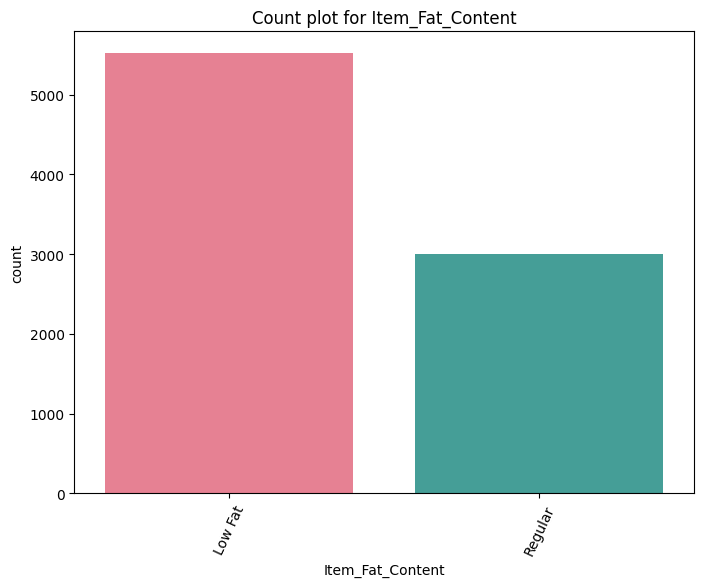

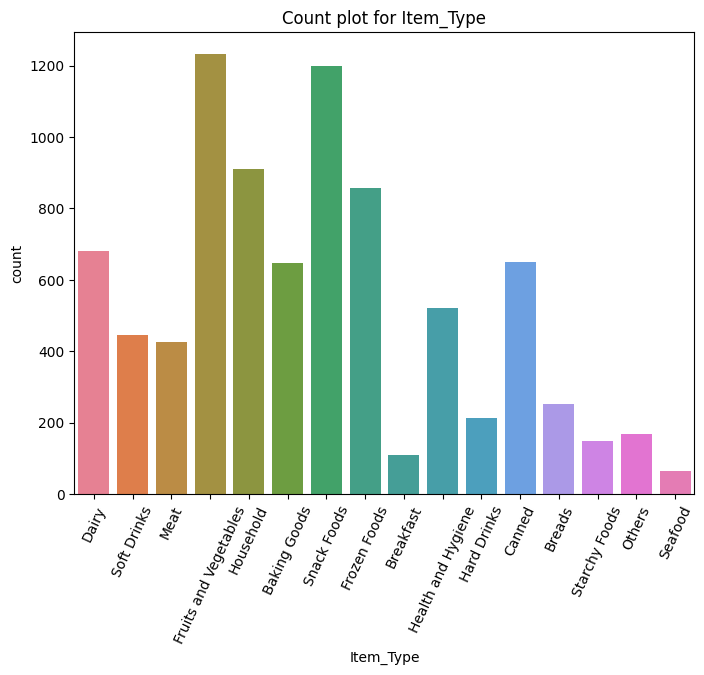

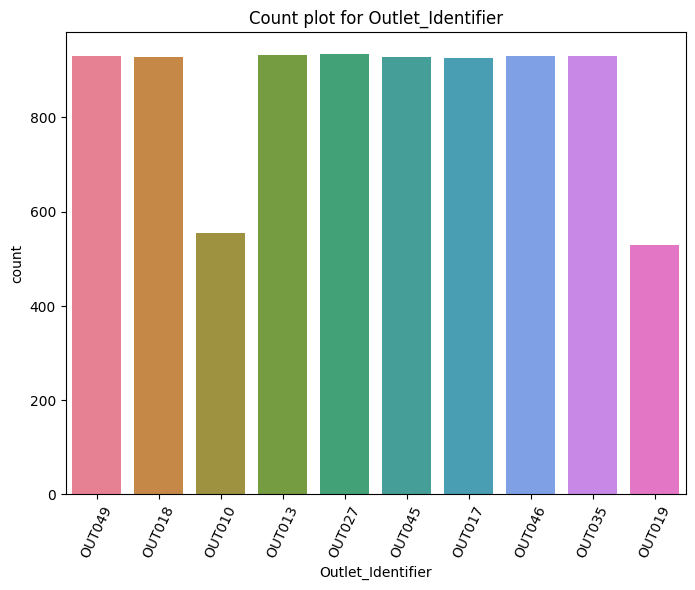

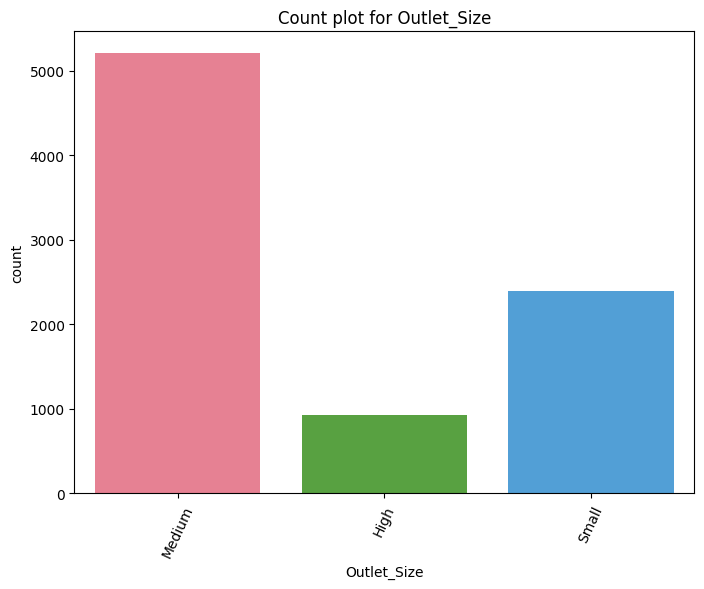

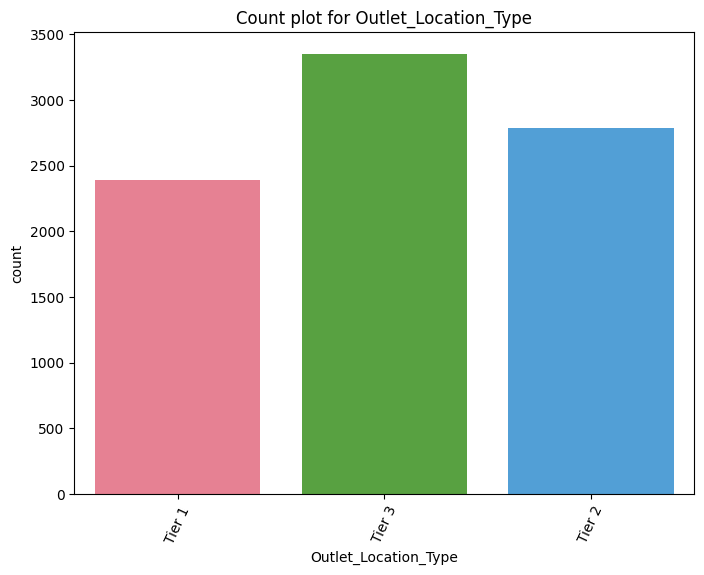

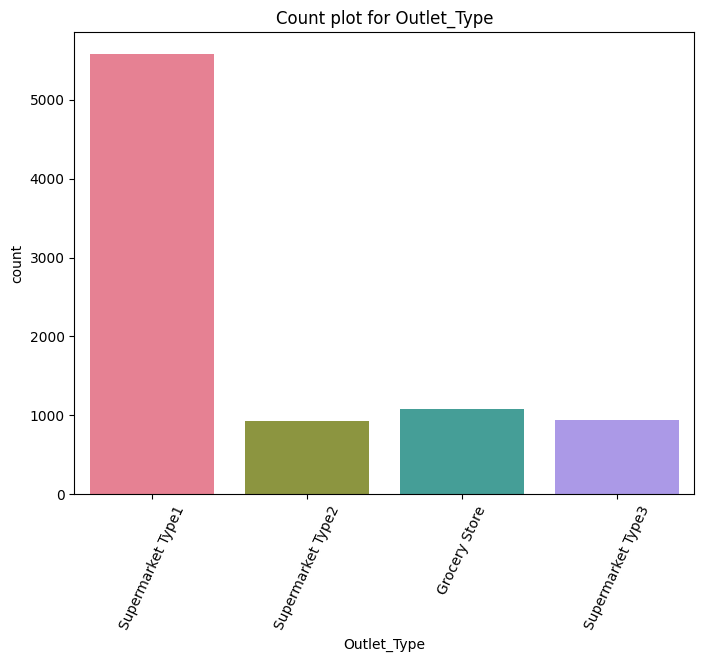

In [178]:
#countplots_for_categorical_columns
for col in categorical_features:
    plt.figure(figsize=(8, 6)) 
    sns.countplot(data=train_df, x=col, palette='husl')
    plt.title(f'Count plot for {col}')
    plt.xticks(rotation=65) 
    plt.show()


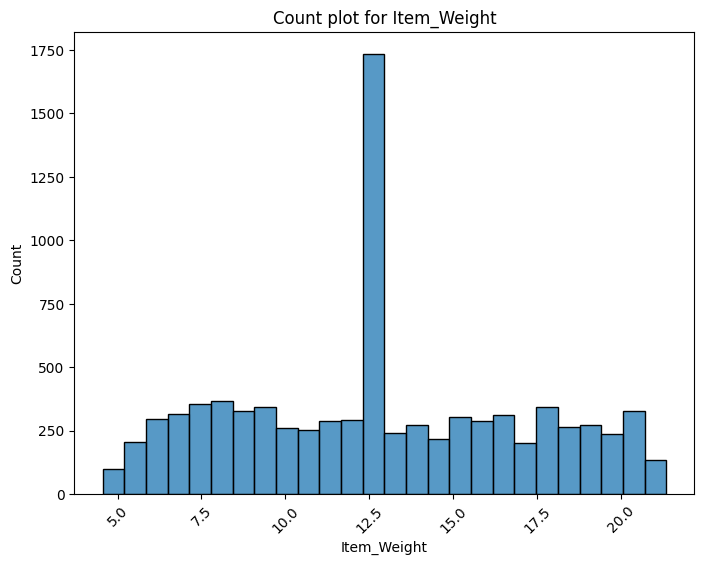

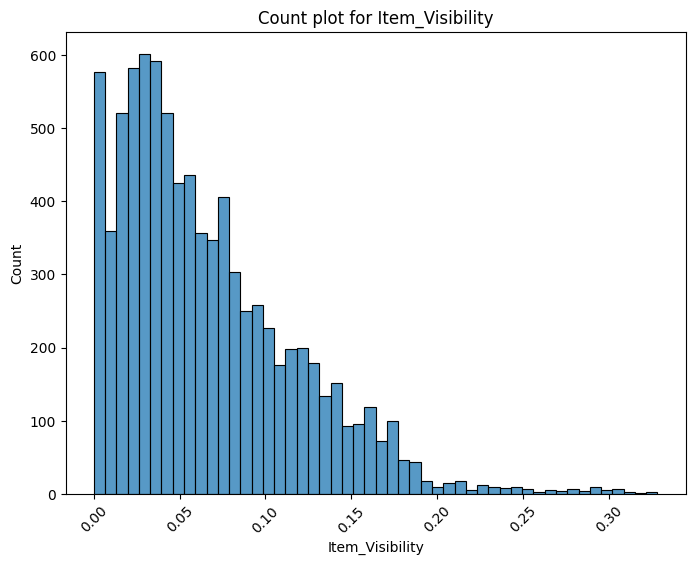

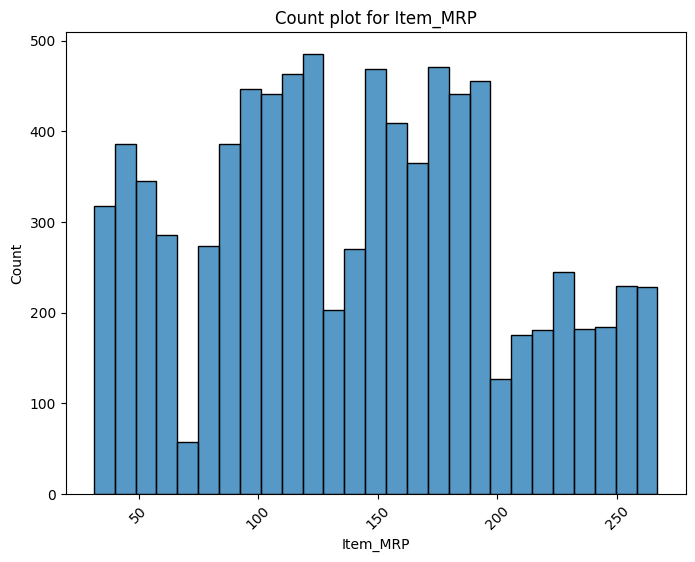

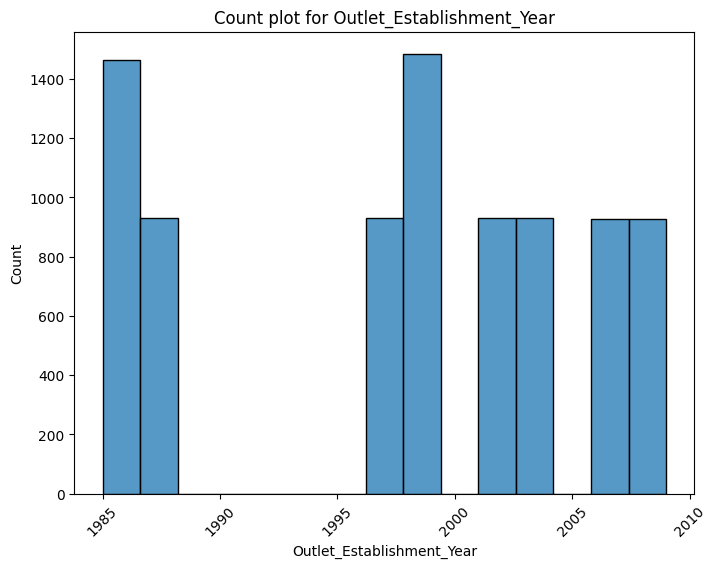

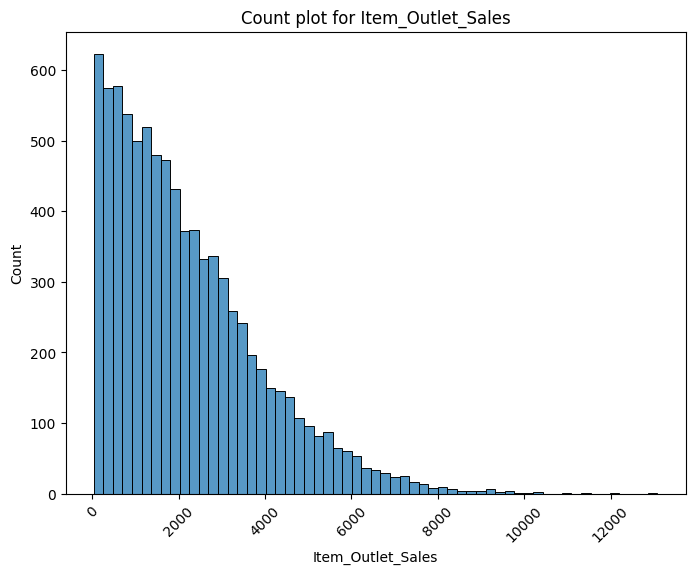

In [179]:
#Countplot for numerical_columns
for col in numerical_features:
    plt.figure(figsize=(8, 6)) 
    sns.histplot(data=train_df, x=col)
    plt.title(f'Count plot for {col}')
    plt.xticks(rotation=45)  
    plt.show()

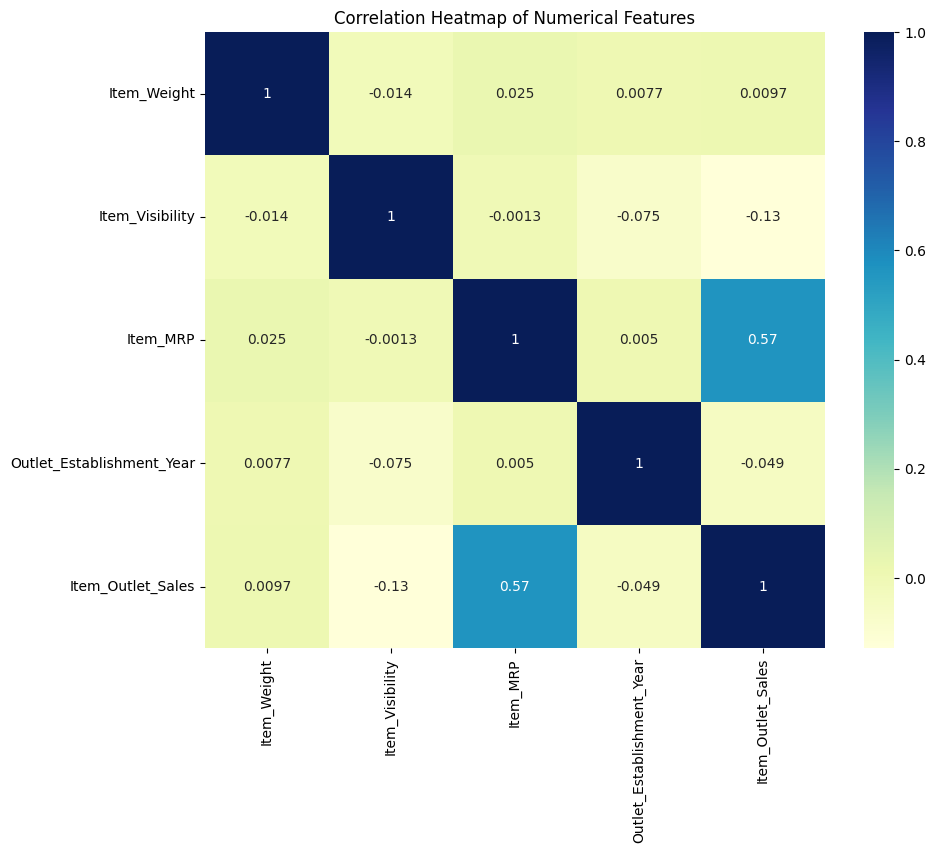

In [180]:
#correlation matrix
numerical_features = train_df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


Label_Encoding

In [181]:
train_df.Outlet_Size.unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [182]:
train_df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [183]:
train_df.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [184]:
train_df.Outlet_Location_Type.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [185]:
train_df.shape

(8523, 12)

In [186]:
from sklearn.preprocessing import LabelEncoder

categorical =['Item_Fat_Content', 'Outlet_Size', 'Outlet_Type', 'Outlet_Location_Type'] 
label_encoder = LabelEncoder()

for feature in categorical:
    train_df[feature] = label_encoder.fit_transform(train_df[feature])
    test_df[feature] = label_encoder.fit_transform(test_df[feature])


In [187]:
train_df.Outlet_Size.unique() #0:High,1:medium,2:Low

array([1, 0, 2])

In [188]:
train_df.Item_Fat_Content.unique() #0:Low_Fat,1:Regular

array([0, 1])

In [189]:
train_df.Outlet_Type.unique() #1:supermarkettype1,2:supermarkettype2,3:supermarkettype3,0:Grocerystore

array([1, 2, 0, 3])

In [190]:
train_df.Outlet_Location_Type.unique() #0:tier1,1:tier2,2:tier3

array([0, 2, 1])

OneHot_Encoding



<Axes: xlabel='Item_Identifier_Categories', ylabel='count'>

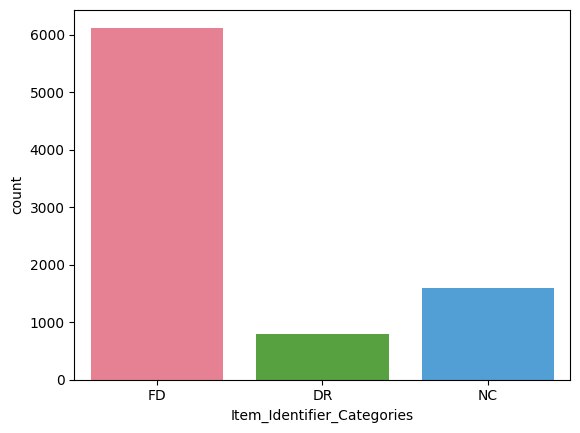

In [191]:
train_df['Item_Identifier_Categories'] = train_df['Item_Identifier'].str[:2]
test_df['Item_Identifier_Categories'] = test_df['Item_Identifier'].str[:2]

sns.countplot(x=train_df['Item_Identifier_Categories'],palette='husl')

FD:food , DR:drinks , NC:non-consumable

In [192]:
# One Hot Encoding for 'Item_Type' variable
train_df = pd.get_dummies(train_df,columns=['Item_Type', 'Item_Identifier_Categories', 'Outlet_Identifier'], drop_first=True)
test_df = pd.get_dummies(test_df,columns=['Item_Type', 'Item_Identifier_Categories', 'Outlet_Identifier'], drop_first=True)

In [193]:
train_df.shape

(8523, 36)

In [194]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,...,Item_Identifier_Categories_NC,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,FDA15,9.30,0,0.016047,249.8092,1999,1,0,1,3735.1380,...,False,False,False,False,False,False,False,False,False,True
1,DRC01,5.92,1,0.019278,48.2692,2009,1,2,2,443.4228,...,False,False,False,True,False,False,False,False,False,False
2,FDN15,17.50,0,0.016760,141.6180,1999,1,0,1,2097.2700,...,False,False,False,False,False,False,False,False,False,True
3,FDX07,19.20,1,0.000000,182.0950,1998,1,2,0,732.3800,...,False,False,False,False,False,False,False,False,False,False
4,NCD19,8.93,0,0.000000,53.8614,1987,0,2,1,994.7052,...,True,True,False,False,False,False,False,False,False,False


In [195]:
train_df.shape

(8523, 36)

In [196]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Identifier                  8523 non-null   object 
 1   Item_Weight                      8523 non-null   float64
 2   Item_Fat_Content                 8523 non-null   int32  
 3   Item_Visibility                  8523 non-null   float64
 4   Item_MRP                         8523 non-null   float64
 5   Outlet_Establishment_Year        8523 non-null   int64  
 6   Outlet_Size                      8523 non-null   int32  
 7   Outlet_Location_Type             8523 non-null   int32  
 8   Outlet_Type                      8523 non-null   int32  
 9   Item_Outlet_Sales                8523 non-null   float64
 10  Item_Type_Breads                 8523 non-null   bool   
 11  Item_Type_Breakfast              8523 non-null   bool   
 12  Item_Type_Canned    

In [197]:
train_df.drop(labels=['Item_Identifier'], axis=1, inplace=True) #droping  item identifier column
test_df.drop(labels=['Item_Identifier'], axis=1,inplace=True)

defining feature columns and target columns

In [198]:
x_train = train_df.drop('Item_Outlet_Sales', axis=1) #features_columns
y_train = train_df['Item_Outlet_Sales'] #target_column

In [199]:
x_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Breads,Item_Type_Breakfast,...,Item_Identifier_Categories_NC,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.30,0,0.016047,249.8092,1999,1,0,1,False,False,...,False,False,False,False,False,False,False,False,False,True
1,5.92,1,0.019278,48.2692,2009,1,2,2,False,False,...,False,False,False,True,False,False,False,False,False,False
2,17.50,0,0.016760,141.6180,1999,1,0,1,False,False,...,False,False,False,False,False,False,False,False,False,True
3,19.20,1,0.000000,182.0950,1998,1,2,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,8.93,0,0.000000,53.8614,1987,0,2,1,False,False,...,True,True,False,False,False,False,False,False,False,False


In [200]:
y_train.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [201]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numerical_features = train_df.select_dtypes(include=['int64', 'float64']).columns
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features)
    ])

preprocessing_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
processed_train_data = preprocessing_pipeline.fit_transform(train_df)


In [202]:
train_df.shape

(8523, 35)

model_training


In [203]:
#LinearRegression_model
from sklearn.linear_model import LinearRegression

LinearRegression_model = LinearRegression()
LinearRegression_model.fit(x_train, y_train)
train_score = LinearRegression_model.score(x_train,y_train)

print("LinearRegressiontrain_score:",train_score)

LinearRegressiontrain_score: 0.5637737001510252


In [204]:
#predicting on test data
predictions = LinearRegression_model.predict(test_df)
predictions_df = pd.DataFrame(predictions, columns=['Prediction'])

folder = "D://sales_price_project/predictions_data"
save_path = os.path.join(folder,'Linearpredictions.csv')

predictions_df.to_csv(save_path, index=False)

In [205]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(x_train, y_train)
train_score = DecisionTree_model.score(x_train, y_train)

print("Decision Tree Train Score:", train_score)


Decision Tree Train Score: 1.0


In [206]:
predictions = DecisionTree_model.predict(test_df)
predictions_df = pd.DataFrame(predictions, columns=['Prediction'])

folder = "D://sales_price_project/predictions_data"
save_path = os.path.join(folder,'DecisionTreepredictions.csv')

predictions_df.to_csv(save_path, index=False)

In [207]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

RandomForest_model = RandomForestRegressor()
RandomForest_model.fit(x_train, y_train)
train_score = RandomForest_model.score(x_train, y_train)

print("Random Forest Train Score:", train_score)


Random Forest Train Score: 0.9391568576977494


In [209]:
predictions = RandomForest_model.predict(test_df)
predictions_df = pd.DataFrame(predictions, columns=['Prediction'])

folder = "D://sales_price_project/predictions_data"
save_path = os.path.join(folder, 'RandomForestpredictions.csv')

predictions_df.to_csv(save_path, index=False)

In [210]:
#SupportVectorRegressor
from sklearn.svm import SVR

SVM_model = SVR()
SVM_model.fit(x_train, y_train)
train_score = SVM_model.score(x_train, y_train)

print("SVM Train Score:", train_score)


SVM Train Score: -0.04651028934491386


In [211]:
predictions = SVM_model.predict(test_df)
predictions_df = pd.DataFrame(predictions, columns=['Prediction'])

folder = "D://sales_price_project/predictions_data"
save_path = os.path.join(folder, 'SVMpredictions.csv')

predictions_df.to_csv(save_path, index=False)

In [212]:
#LassoRegressor
from sklearn.linear_model import Lasso

Lasso_model = Lasso(alpha=0.1)  # Adjust alpha parameter as needed
Lasso_model.fit(x_train, y_train)
train_score = Lasso_model.score(x_train, y_train)

print("Lasso Regression Train Score:", train_score)


Lasso Regression Train Score: 0.5637659451435821


In [213]:
predictions = Lasso_model.predict(test_df)
predictions_df = pd.DataFrame(predictions, columns=['Prediction'])

folder = "D://sales_price_project/predictions_data"
save_path = os.path.join(folder, 'Lassopredictions.csv')

predictions_df.to_csv(save_path, index=False)

In [214]:
#XGBoost
import xgboost as xgb

XGB_model = xgb.XGBRegressor()
XGB_model.fit(x_train, y_train)
train_score = XGB_model.score(x_train, y_train)

print("XGBoost Train Score:", train_score)


XGBoost Train Score: 0.8404021155073916


In [215]:
predictions = XGB_model.predict(test_df)
predictions_df = pd.DataFrame(predictions, columns=['Prediction'])

folder = "D://sales_price_project/predictions_data"
save_path = os.path.join(folder, 'XGBpredictions.csv')

predictions_df.to_csv(save_path, index=False)

From above Xgboost performs well on train data and test data 


In [216]:
import joblib
folder = "D://sales_price_project/final_model"
save_path = os.path.join(folder, 'XGB_model.pkl')

joblib.dump(XGB_model, save_path)

print("Model saved successfully at:", save_path)

# Load the saved model from file
loaded_model = joblib.load(save_path)



Model saved successfully at: D://sales_price_project/final_model\XGB_model.pkl
